>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-dataset-cleaned/mobile_detail.csv


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  Smartphone Price Prediction </h1>
</div>


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LIBRARY IMPORTS
</div>


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;>
    LIBRARY IMPORTS
</div>
>

>
v>


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LOAD DATA
</div>

In [3]:
df = pd.read_csv('/kaggle/input/mobile-dataset-cleaned/mobile_detail.csv')
df.head()

,ratings,price,imgURL,corpus,brand,mobile_name,color,storage,system,processor_type,resolution,size
0,4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,storage128 gbram6 systemandroid 12processor t...,redmi,Note 12 Pro 5G,black,128,android,mediatek,Full HD,6.7
1,4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,storage128 gbram6 gbexpandable storage256gb s...,oppo,F11 Pro,green,128,android,mediatek,Full HD,6.5
2,4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,storage64 gbram4 systemandroid 11processor sp...,redmi,Note 11,white,64,android,NaN,Full HD,6.4
3,4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,storage256 gbram12 systemandroid q 11processo...,oneplus,Nord CE 5G,blue,256,android,qualcomm,Full HD,6.4
4,4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,storage128 systemios 15processor typea15 bion...,apple,iPhone 13 mini,blue,128,ios,apple,Full HD,5.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ratings         1984 non-null   float64
 1   price           1984 non-null   int64  
 2   imgURL          1984 non-null   object 
 3   corpus          1984 non-null   object 
 4   brand           1984 non-null   object 
 5   mobile_name     1984 non-null   object 
 6   color           1984 non-null   object 
 7   storage         1984 non-null   int64  
 8   system          1984 non-null   object 
 9   processor_type  1644 non-null   object 
 10  resolution      1984 non-null   object 
 11  size            1983 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 186.1+ KB


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Handling missing data
</div>

In [5]:
df.isnull().sum()

ratings             0
price               0
imgURL              0
corpus              0
brand               0
mobile_name         0
color               0
storage             0
system              0
processor_type    340
resolution          0
size                1
dtype: int64

# Fill missing processor_type with 'unknown'

In [6]:

df['processor_type'].fillna('unknown', inplace=True)

# Drop the missing data of size

In [7]:

df.dropna(inplace=True)

In [8]:
df.isnull().sum()

ratings           0
price             0
imgURL            0
corpus            0
brand             0
mobile_name       0
color             0
storage           0
system            0
processor_type    0
resolution        0
size              0
dtype: int64

In [9]:
df.shape

(1983, 12)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Statastical Summary
</div>

In [10]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
ratings,1983.000000,4.303833,0.207468,2.900000,4.200000,4.300000,4.400000,5.000000
price,1983.000000,17028.480585,8620.669785,73.000000,10499.000000,15337.000000,23463.000000,89999.000000
storage,1983.000000,123.997983,91.562378,16.000000,64.000000,128.000000,128.000000,512.000000
size,1983.000000,6.350378,0.505907,1.800000,6.300000,6.500000,6.600000,7.600000


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Encoding
</div>

In [11]:
drop_col=['imgURL','corpus','mobile_name']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,brand,color,system,processor_type,resolution
0,redmi,black,android,mediatek,Full HD
1,oppo,green,android,mediatek,Full HD
2,redmi,white,android,unknown,Full HD
3,oneplus,blue,android,qualcomm,Full HD
4,apple,blue,ios,apple,Full HD
...,...,...,...,...,...
1979,oneplus,blue,android,unknown,2K
1980,motorola,grey,android,mediatek,Full HD
1981,redmi,black,android,mediatek,Full HD
1982,oneplus,black,android,unknown,Full HD


In [12]:
df[object_columns]

,brand,color,system,processor_type,resolution
0,redmi,black,android,mediatek,Full HD
1,oppo,green,android,mediatek,Full HD
2,redmi,white,android,unknown,Full HD
3,oneplus,blue,android,qualcomm,Full HD
4,apple,blue,ios,apple,Full HD
...,...,...,...,...,...
1979,oneplus,blue,android,unknown,2K
1980,motorola,grey,android,mediatek,Full HD
1981,redmi,black,android,mediatek,Full HD
1982,oneplus,black,android,unknown,Full HD


In [13]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'brand':
['redmi' 'oppo' 'oneplus' 'apple' 'infinix' 'samsung' 'vivo' 'motorola'
 'realme' 'mi' 'tecno' 'xiaomi']

Unique values in 'color':
['black' 'green' 'white' 'blue' 'gold' 'purple' 'red' 'grey' 'silver']

Unique values in 'system':
['android' 'ios']

Unique values in 'processor_type':
['mediatek' 'unknown' 'qualcomm' 'apple' 'unisoc' 'samsung']

Unique values in 'resolution':
['Full HD' '4K' 'HD' '2K']



# One-Hot encoding

In [14]:
df1 = pd.get_dummies(df, columns=object_columns)

In [15]:
df1

,ratings,price,storage,size,brand_apple,brand_infinix,brand_mi,brand_motorola,brand_oneplus,brand_oppo,...,processor_type_apple,processor_type_mediatek,processor_type_qualcomm,processor_type_samsung,processor_type_unisoc,processor_type_unknown,resolution_2K,resolution_4K,resolution_Full HD,resolution_HD
0,4.2,23999,128,6.7,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,4.5,20999,128,6.5,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,4.2,13149,64,6.4,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,4.1,21999,256,6.4,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
4,4.6,3537,128,5.4,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,4.2,29999,256,6.7,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
1980,4.1,15999,128,6.5,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1981,4.3,11999,64,6.5,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1982,3.9,30203,128,6.5,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [16]:
df1.shape

(1983, 37)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    EDA
</div>

<Axes: >

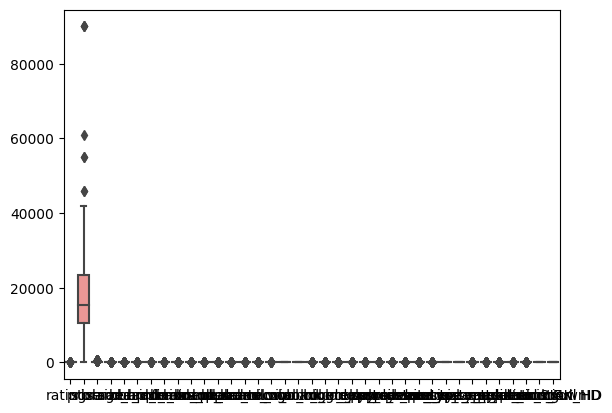

In [17]:
sns.boxplot(df1)

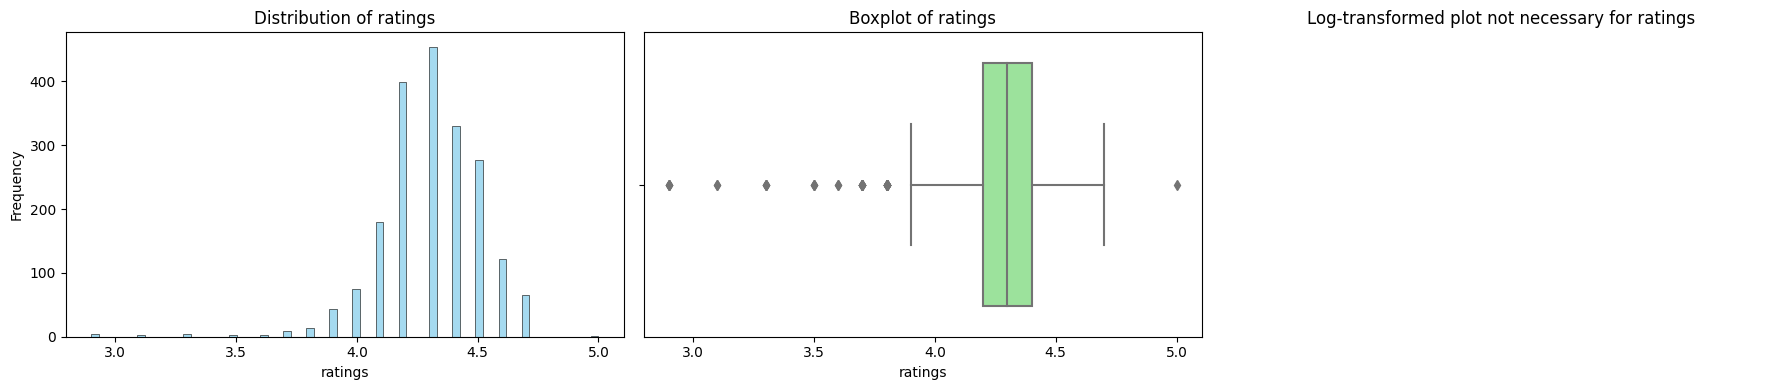

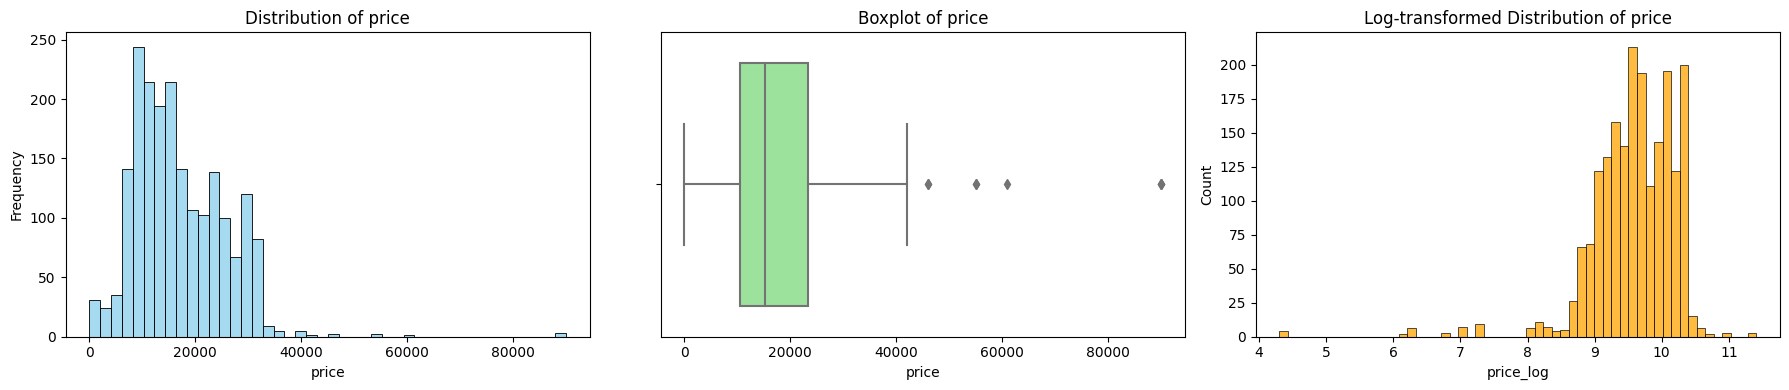

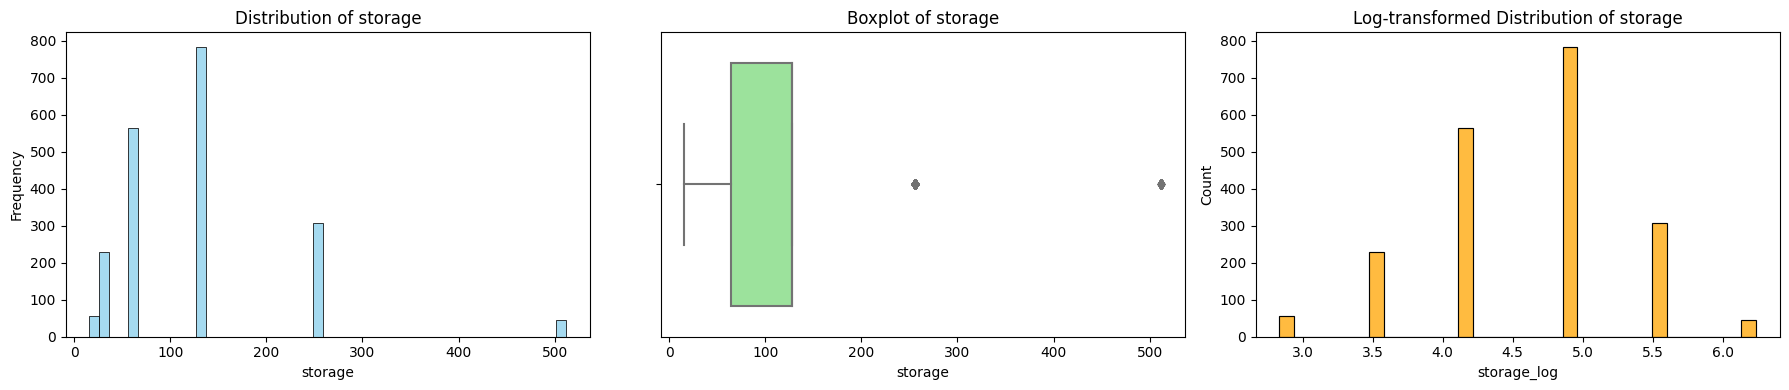

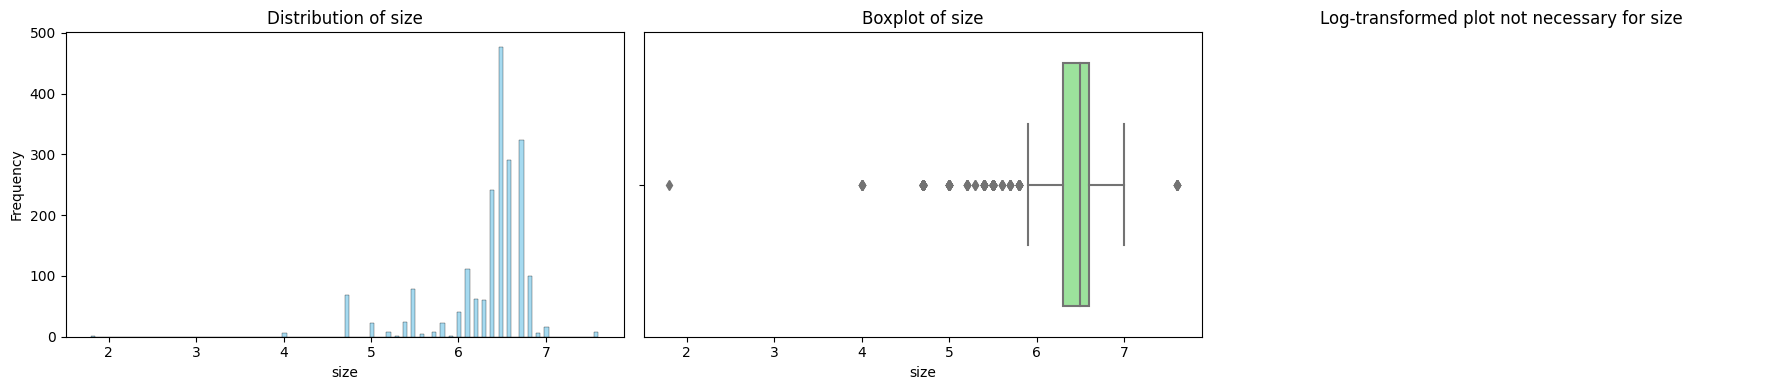

In [18]:
import matplotlib.pyplot as plt
import numpy as np
non_boolean_numerical_features = ['ratings', 'price', 'storage', 'size']

# Get all boolean columns
boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()

# Filter out non-boolean numerical features
boolean_features_except_numerical = [col for col in boolean_columns if col not in non_boolean_numerical_features]
# Visualize the distributions and box plots for numerical features, including log-transformed versions for skewed data
for column in non_boolean_numerical_features:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # Histogram for the distribution
    sns.histplot(df1[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    # Boxplot for the variable
    sns.boxplot(x=df1[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')

    # Log transformation and plot if the data is skewed
    if df1[column].skew() > 1:
        df1[column+'_log'] = np.log1p(df1[column])
        sns.histplot(df1[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 15px;"> we can not consider these outlier for above feature because according to the daomain knowledge it there can be values ike this. </h1>
</div>

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Feature Scaling
</div>

In [19]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ['ratings', 'price', 'storage', 'size']
scaler = MinMaxScaler()
df1[non_boolean_numerical_features] = scaler.fit_transform(df1[non_boolean_numerical_features])


In [20]:
df1

,ratings,price,storage,size,brand_apple,brand_infinix,brand_mi,brand_motorola,brand_oneplus,brand_oppo,...,processor_type_qualcomm,processor_type_samsung,processor_type_unisoc,processor_type_unknown,resolution_2K,resolution_4K,resolution_Full HD,resolution_HD,price_log,storage_log
0,0.619048,0.266063,0.225806,0.844828,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,10.085809,4.859812
1,0.761905,0.232702,0.225806,0.810345,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,9.952278,4.859812
2,0.619048,0.145408,0.096774,0.793103,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,9.484177,4.174387
3,0.571429,0.243823,0.483871,0.793103,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,9.998798,5.549076
4,0.809524,0.038521,0.225806,0.620690,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,8.171317,4.859812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,0.619048,0.332785,0.483871,0.844828,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,10.308953,5.549076
1980,0.571429,0.177101,0.225806,0.810345,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,9.680344,4.859812
1981,0.666667,0.132620,0.096774,0.810345,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,9.392662,4.174387
1982,0.476190,0.335053,0.225806,0.810345,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,10.315730,4.859812


For regression tasks where the target variable is continuous, it's generally not necessary to scale the target variable. Algorithms like Linear Regression, Decision Trees, Random Forest, and Gradient Boosting Machines can handle continuous target variables without requiring scaling.

if you're using algorithms that are sensitive to the scale of the target variable, such as Support Vector Machines (SVM) with a regression (SVR) or NuSVR kernel, you might consider scaling the target variable

In [21]:
y_unscaled=df['price']
y_unscaled

0       23999
1       20999
2       13149
3       21999
4        3537
        ...  
1979    29999
1980    15999
1981    11999
1982    30203
1983    13999
Name: price, Length: 1983, dtype: int64

In [22]:
y_scaled = df1['price']
y_scaled

0       0.266063
1       0.232702
2       0.145408
3       0.243823
4       0.038521
          ...   
1979    0.332785
1980    0.177101
1981    0.132620
1982    0.335053
1983    0.154861
Name: price, Length: 1983, dtype: float64

In [23]:
df1

,ratings,price,storage,size,brand_apple,brand_infinix,brand_mi,brand_motorola,brand_oneplus,brand_oppo,...,processor_type_qualcomm,processor_type_samsung,processor_type_unisoc,processor_type_unknown,resolution_2K,resolution_4K,resolution_Full HD,resolution_HD,price_log,storage_log
0,0.619048,0.266063,0.225806,0.844828,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,10.085809,4.859812
1,0.761905,0.232702,0.225806,0.810345,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,9.952278,4.859812
2,0.619048,0.145408,0.096774,0.793103,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,9.484177,4.174387
3,0.571429,0.243823,0.483871,0.793103,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,9.998798,5.549076
4,0.809524,0.038521,0.225806,0.620690,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,8.171317,4.859812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,0.619048,0.332785,0.483871,0.844828,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,10.308953,5.549076
1980,0.571429,0.177101,0.225806,0.810345,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,9.680344,4.859812
1981,0.666667,0.132620,0.096774,0.810345,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,9.392662,4.174387
1982,0.476190,0.335053,0.225806,0.810345,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,10.315730,4.859812


In [24]:
x = df1.drop(['price'],axis=1)
x

,ratings,storage,size,brand_apple,brand_infinix,brand_mi,brand_motorola,brand_oneplus,brand_oppo,brand_realme,...,processor_type_qualcomm,processor_type_samsung,processor_type_unisoc,processor_type_unknown,resolution_2K,resolution_4K,resolution_Full HD,resolution_HD,price_log,storage_log
0,0.619048,0.225806,0.844828,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,10.085809,4.859812
1,0.761905,0.225806,0.810345,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,9.952278,4.859812
2,0.619048,0.096774,0.793103,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,9.484177,4.174387
3,0.571429,0.483871,0.793103,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,9.998798,5.549076
4,0.809524,0.225806,0.620690,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,8.171317,4.859812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,0.619048,0.483871,0.844828,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,10.308953,5.549076
1980,0.571429,0.225806,0.810345,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,9.680344,4.859812
1981,0.666667,0.096774,0.810345,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,9.392662,4.174387
1982,0.476190,0.225806,0.810345,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,10.315730,4.859812


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Splitting data
</div>

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

In [26]:
X_train

,ratings,storage,size,brand_apple,brand_infinix,brand_mi,brand_motorola,brand_oneplus,brand_oppo,brand_realme,...,processor_type_qualcomm,processor_type_samsung,processor_type_unisoc,processor_type_unknown,resolution_2K,resolution_4K,resolution_Full HD,resolution_HD,price_log,storage_log
720,0.857143,1.000000,0.741379,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,8.531885,6.240276
480,0.666667,0.225806,0.810345,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,9.797627,4.859812
567,0.809524,1.000000,0.689655,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,9.130106,6.240276
71,0.666667,0.032258,0.775862,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,9.104869,3.496508
1693,0.714286,0.225806,0.810345,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,10.107978,4.859812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.761905,0.032258,0.810345,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,8.993427,3.496508
1295,0.619048,0.225806,0.827586,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,9.546813,4.859812
861,0.761905,0.225806,0.844828,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,10.158246,4.859812
1460,0.666667,0.032258,0.810345,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,9.158099,3.496508


In [27]:
y_train

720     0.055601
480     0.199242
567     0.101806
71      0.099248
1693    0.272046
          ...   
1131    0.088695
1295    0.154861
861     0.286113
1460    0.104719
1127    0.199342
Name: price, Length: 1586, dtype: float64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Training and evalution of model
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> LinearRegression </h1>
</div>


In [28]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)



LinearRegression()

In [29]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)



In [30]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.003911375411876437
Testing MSE: 0.002656753604869572
Training R2 Score: 0.5871440260458628
Testing R2 Score: 0.6690606847157776


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

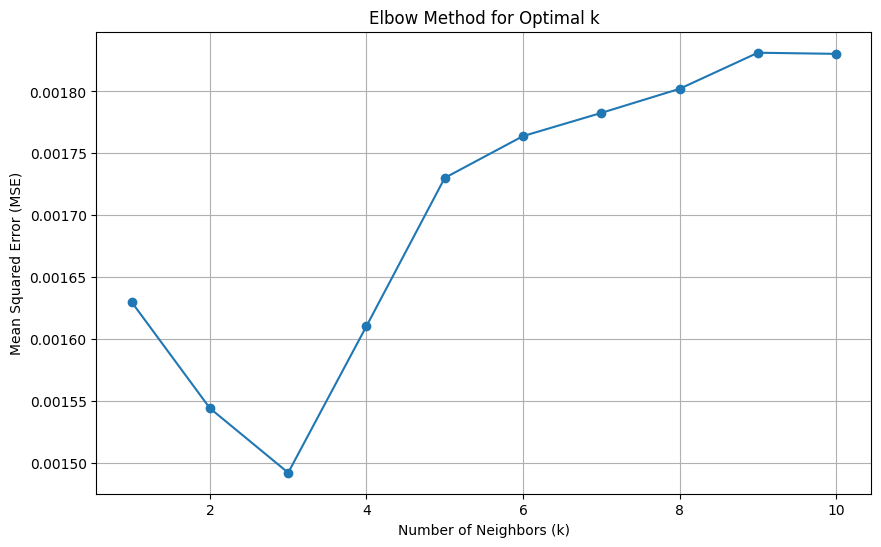

In [31]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [32]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")



Optimal number of neighbors (k): 3


In [33]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=3)

In [34]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [35]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0007921727742779289
Testing MSE: 0.0014922491805218732
Training R2 Score: 0.9163840777667605
Testing R2 Score: 0.8141175300825103


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTreeRegressor </h1>
</div>

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=9)

In [38]:
# Make predictions
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [39]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")



Training MSE: 1.5646032797550282e-08
Testing MSE: 1.327218589599659e-06
Training R2 Score: 0.9999983485200399
Testing R2 Score: 0.9998346746154896


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForestRegressor </h1>
</div>

In [40]:

from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [41]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(n_estimators=300)

In [42]:
# Make predictions
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 3.78704861515181e-06
Testing MSE: 4.6899791380479034e-06
Training R2 Score: 0.999600267046811
Testing R2 Score: 0.9994157913320234


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> XGBRegressor </h1>
</div>

In [43]:

from xgboost import XGBRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBoost model
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [45]:
# Make predictions
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Training MSE: 2.0575309578596992e-06
Testing MSE: 1.810108864192554e-05
Training R2 Score: 0.9997828221896142
Testing R2 Score: 0.9977452324257402


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Model comparison
</div>

In [46]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Initialize an empty list to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})

# Create DataFrame from results list
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df


,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,3.911375e-03,0.002657,0.587144,0.669061
1,Decision Tree,1.229571e-33,0.000001,1.000000,0.999835
2,Random Forest,3.000291e-06,0.000006,0.999683,0.999242
3,XGBoost,5.474425e-07,0.000058,0.999942,0.992760


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Conclusion
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Decision Tree and Random Forest models stand out for their excellent performance on both training and testing data, with Random Forest having slightly better generalization. XGBoost also performs exceptionally well but shows a slight drop in performance on the testing data compared to Random Forest. Linear Regression, while good, is slightly less robust compared to the tree-based models.</h1>
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">if you like my notebook give upvote , it will encourage me thanks for exploring my notebook.</h1>
</div>